#**Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.**

- Boosting is an ensemble learning technique that sequentially combines multiple weak learners to form a strong learner. The core idea is to train a sequence of models, where each subsequent model focuses on correcting the errors made by the previous ones. Here's how it improves weak learners:

**1.Sequential Learning:** Unlike bagging (e.g., Random Forests) where models are trained independently, boosting trains models in a sequence. Each new weak learner is trained with a focus on the examples that the previous learners misclassified or handled poorly.

**2.Weighted Data/Errors:** In most boosting algorithms (like AdaBoost), misclassified data points from the previous model are given higher weights or attention in the training of the next model. This forces the subsequent weak learner to concentrate on these 'hard' examples, thereby reducing the overall error.

**3.Error Correction:** Each successive weak learner tries to correct the errors of its predecessor. By iteratively refining the model's performance on challenging data points, the ensemble gradually builds a more accurate and robust predictive model.

**4.Combining Weaknesses into Strength:** Individually, a weak learner might perform only slightly better than random guessing. However, by combining many such weak learners, each specializing in different aspects of the data or correcting specific errors, boosting creates a powerful model that can achieve high accuracy. The combined predictions often leverage the complementary strengths of the individual weak learners.

#**Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**

- The primary difference between AdaBoost and Gradient Boosting lies in how they train subsequent models and address errors:

**AdaBoost (Adaptive Boosting):**

**- Focus:** AdaBoost adaptively adjusts the weights of the training data instances. It focuses on misclassified samples by increasing their weights in subsequent iterations.

**- Error Correction:** Each weak learner tries to correctly classify the weighted data. The overall model learns by giving more importance to previously misclassified data points.

**- What new models predict:** Each new weak learner is trained on the original data, but with updated sample weights.

**Gradient Boosting:**

**- Focus:** Gradient Boosting focuses on fitting subsequent models to the residuals (the errors) of the previous models. It learns from the 'mistakes' by trying to predict what's left to be predicted.

**- Error Correction:** Each weak learner is trained to predict the negative gradient of the loss function, which essentially means it's trying to predict the error made by the ensemble so far.

**- What new models predict:** Each new weak learner is trained on the residuals (the differences between actual values and the predictions of the previous ensemble), not directly on the original data.


#**Question 3: How does regularization help in XGBoost?**

- Regularization plays a crucial role in XGBoost (Extreme Gradient Boosting) by helping to prevent overfitting and improve the model's generalization capabilities. XGBoost incorporates several types of regularization techniques, primarily driven by its underlying gradient boosting framework:

**1. L1 and L2 Regularization (Lasso and Ridge Penalties) on Weights:**

  - XGBoost applies L1 (Lasso) and L2 (Ridge) regularization to the weights of the leaf nodes in the trees. These penalties are added to the objective function that XGBoost tries to minimize.

  - L1 regularization (alpha parameter): Encourages sparsity by driving some weights to exactly zero, effectively performing feature selection at the tree-building stage and simplifying the model.

  - L2 regularization (lambda parameter): Penalizes large weights, discouraging complex models and helping to smooth out the predictions.
  
  - How it helps: By penalizing the complexity of the individual trees and their leaf weights, these regularizers prevent the model from learning overly specific patterns from the training data that might not generalize well to unseen data. It forces the model to find simpler structures.

**2.Shrinkage (Learning Rate / eta parameter):**

 - XGBoost uses a learning rate (also called eta) that scales down the contribution of each individual tree's prediction when it's added to the ensemble. Instead of adding the full prediction of a new tree, only a fraction of it is added.

 - How it helps: This technique slows down the learning process, allowing subsequent trees to correct errors more gradually. It prevents any single tree from dominating the learning process and helps to make the overall model more robust. It's like taking small, careful steps towards the optimal solution rather than big, potentially unstable jumps.

 **3.Subsampling of Rows (subsample parameter):**

- XGBoost allows for training each tree on a random fraction of the training data (similar to bagging).

- How it helps: This reduces variance by making each tree slightly different and less sensitive to specific training examples. It also speeds up computation for large datasets.

**4.Subsampling of Features (colsample_bytree, colsample_bylevel, colsample_bynode parameters):**

- XGBoost can also train each tree on a random subset of features (columns).

- How it helps: This further reduces variance and prevents any single feature from having too much influence on the model, leading to a more generalized and robust model.

**5.Maximum Tree Depth (max_depth parameter):**

- While not a regularization technique in the traditional sense of adding a penalty term, limiting the maximum depth of individual trees is a form of pre-pruning that directly controls the complexity of each weak learner.

- How it helps: Shallow trees are less likely to overfit. By controlling max_depth, you prevent individual trees from becoming too complex and memorizing the training data.

**In summary, regularization in XGBoost:**

- Prevents Overfitting: By penalizing complex models and encouraging simpler structures, it ensures the model learns general patterns rather than noise in the training data.

- Improves Generalization: A regularized model is more likely to perform well on new, unseen data.

- Increases Robustness: Techniques like subsampling reduce the model's sensitivity to individual data points or features.

- Provides Control: Hyperparameters like alpha, lambda, eta, subsample, and colsample give users fine-grained control over the bias-variance trade-off.

#**Question 4: Why is CatBoost considered efficient for handling categorical data?**

CatBoost is considered highly efficient and effective for handling categorical data primarily due to its innovative approach to processing these features, which helps to mitigate common issues like target leakage and prediction shift.

Here are the main reasons:

**1.Ordered Target Encoding (Permutation-driven Target Encoding):**

- The Problem: Traditional target encoding methods (e.g., replacing a category with the average target value for that category) can suffer from target leakage. This happens because the target value itself is used to create the feature, leading to an overly optimistic evaluation of the model's performance on the training data, and poor generalization to new data.

- CatBoost's Solution: CatBoost uses a sophisticated, ordered target encoding scheme. For each example in the training set, the categorical feature value is replaced by the average target value of a subset of previous examples (based on a random permutation of the dataset). This means that the target value of the current example is not used in its own feature transformation, thereby preventing target leakage.

- Efficiency: This 'ordered' approach ensures that the information used for encoding is always from an 'earlier' point in the data sequence, making the encoding robust and less prone to overfitting.

**2.One-Hot Encoding (for low cardinality categories):**

- For categorical features with a small number of unique values (low cardinality), CatBoost can automatically apply one-hot encoding. This is a standard and efficient way to handle such features, preventing the creation of too many sparse features that might arise from other encoding methods.

**3.Combination of Categorical Features (on-the-fly):**

- The Problem: Interactions between categorical features can be very informative, but manually creating all possible combinations can lead to a combinatorial explosion of new features, which is computationally expensive and can lead to overfitting.

- CatBoost's Solution: CatBoost can intelligently combine categorical features on-the-fly during training. It doesn't combine all possible pairs or triplets initially; instead, it considers combinations that appear promising (e.g., based on splits in the trees). This allows it to capture complex interactions without the need for extensive manual feature engineering.

- Efficiency: By doing this dynamically and only for relevant combinations, it manages complexity and computational cost efficiently.

**4.Handling of Missing Values:**

- CatBoost has a built-in mechanism to handle missing values in categorical features. It treats missing values as a separate category, allowing the model to learn specific patterns associated with their absence, rather than requiring imputation which can sometimes introduce noise or bias.

**5.Prediction Shift Mitigation:**

- CatBoost also addresses the problem of prediction shift, which can occur when the distribution of features or target changes between training and testing. By using ordered boosting and its specialized categorical feature handling, it aims to create more stable and generalizable models.

#**Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?**

Boosting techniques are often preferred over bagging methods (like Random Forests) in real-world applications when the goal is to achieve the highest possible predictive accuracy, particularly in situations where identifying and correcting errors is crucial. While bagging methods reduce variance, boosting methods primarily reduce bias and can often yield superior performance on complex datasets, provided they are carefully tuned to avoid overfitting. Here are some real-world applications where boosting often shines:

**1.Fraud Detection:**

- Why Boosting? Fraudulent transactions are typically rare events (imbalanced data) and often represent complex patterns that are hard to detect. Boosting algorithms excel at focusing on misclassified instances (potential fraud cases) and sequentially improving their detection ability. Identifying these 'hard-to-learn' cases is critical.

- Examples: Detecting credit card fraud, insurance fraud, online transaction anomalies.

**2.Credit Risk Assessment:**

- Why Boosting? Predicting whether a loan applicant will default is a high-stakes classification problem. Boosting models can learn intricate relationships between various financial indicators and borrower behavior, leading to more accurate predictions of default risk, which directly impacts financial institutions' profitability and stability.

- Examples: Approving or denying loan applications, setting interest rates.

**3.Medical Diagnosis and Prognosis:**

- Why Boosting? In healthcare, accuracy is paramount. Boosting can be used to diagnose diseases based on patient data (symptoms, lab results) or predict disease progression. The iterative error correction nature of boosting helps in building highly accurate models for complex medical scenarios.

- Examples: Predicting disease onset (e.g., diabetes, heart disease), cancer recurrence prediction, personalized treatment recommendations.

**4.Ad Click-Through Rate (CTR) Prediction / Recommendation Systems:**

- Why Boosting? Predicting whether a user will click on an ad or be interested in a product is vital for online advertising and e-commerce. Boosting models can capture subtle user preferences and contextual information to make highly accurate predictions, leading to better ad targeting and product recommendations.

- Examples: Personalizing user feeds, suggesting products to buy, optimizing ad placements.

**5.Search Ranking:**

- Why Boosting? Search engines use complex algorithms to rank web pages based on relevance to a user's query. Boosting algorithms are highly effective in learning from various features (e.g., page content, backlinks, user behavior) to construct sophisticated ranking models that prioritize the most relevant results.

- Examples: Google's RankBrain (which is reported to use a form of gradient boosting).

**6.Image Recognition and Object Detection (older methods, often combined with feature engineering):**

- Why Boosting? Before the deep learning revolution, boosting (especially AdaBoost with Haar features) was a leading technique for object detection (e.g., Viola-Jones face detector). It's efficient at building strong classifiers from simple features by focusing on difficult examples.

- Examples: Face detection in digital cameras, pedestrian detection in early autonomous driving systems.

**7.Customer Churn Prediction:**

- Why Boosting? Identifying customers who are likely to churn (cancel a service) allows companies to proactively intervene. Boosting models can accurately predict churn by learning complex patterns from customer usage data, billing history, and interactions.

- Examples: Telecommunications, subscription services, banking.

**Key Reasons for Preference:**

- Higher Accuracy: Boosting often achieves state-of-the-art results due to its bias-reduction capabilities and ability to correct previous errors.

- Focus on Hard Examples: The iterative nature of boosting allows it to pay more attention to misclassified or challenging data points, leading to a more robust model.

- Flexibility: Gradient Boosting, in particular, is highly flexible and can optimize various loss functions, making it suitable for a wide range of problem types (classification, regression, ranking, etc.).

#Datasets:
● Use sklearn.datasets.load_breast_cancer() for classification tasks.

● Use sklearn.datasets.fetch_california_housing() for regression
tasks.


#**Question 6: Write a Python program to:**

● Train an AdaBoost Classifier on the Breast Cancer dataset

● Print the model accuracy

In [1]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Load the Breast Cancer Dataset

In [2]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

### Split the data into training and testing sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train an AdaBoost Classifier

In [4]:
# Initialize the base estimator (a decision tree is common for AdaBoost)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost Classifier
adaboost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

### Make predictions and print the model accuracy

In [5]:
# Make predictions on the test set
y_pred = adaboost_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")

AdaBoost Classifier Accuracy: 0.9708


#**Question 7: Write a Python program to:**

● Train a Gradient Boosting Regressor on the California Housing dataset

● Evaluate performance using R-squared score


In [6]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Load the California Housing Dataset

In [7]:
# Load the California Housing dataset
housing = fetch_california_housing()
X_housing = housing.data
y_housing = housing.target

### Split the data into training and testing sets

In [8]:
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.3, random_state=42)

### Train a Gradient Boosting Regressor

In [9]:
# Initialize Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr_model.fit(X_train_housing, y_train_housing)

GradientBoostingRegressor(random_state=42)

### Make predictions and evaluate performance using R-squared score

In [10]:
# Make predictions on the test set
y_pred_housing = gbr_model.predict(X_test_housing)

# Calculate and print the R-squared score
r2 = r2_score(y_test_housing, y_pred_housing)
print(f"Gradient Boosting Regressor R-squared: {r2:.4f}")

Gradient Boosting Regressor R-squared: 0.7803


#**Question 8: Write a Python program to:**

● Train an XGBoost Classifier on the Breast Cancer dataset

● Tune the learning rate using GridSearchCV

● Print the best parameters and accuracy

In [11]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

### Load the Breast Cancer Dataset

In [12]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

### Split the data into training and testing sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train an XGBoost Classifier and tune learning rate using GridSearchCV

In [14]:
# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the parameter grid for learning_rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:43:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1, param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2]},
             scoring='accuracy', verbose=1)

### Print the best parameters and accuracy

In [15]:
# Print the best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

# Calculate and print the accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy with best parameters: {accuracy_xgb:.4f}")

Best parameters: {'learning_rate': 0.1}
XGBoost Classifier Accuracy with best parameters: 0.9591


#**Question 9: Write a Python program to:**

● Train a CatBoost Classifier

● Plot the confusion matrix using seaborn

In [21]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.0 MB/s eta 0:00:00


In [22]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Breast Cancer Dataset

In [17]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

### Split the data into training and testing sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train a CatBoost Classifier

In [23]:
# Initialize CatBoost Classifier
cat_model = CatBoostClassifier(iterations=100,  # Number of boosting rounds
                                 learning_rate=0.1,
                                 depth=6,
                                 loss_function='Logloss',
                                 eval_metric='Accuracy',
                                 random_seed=42,
                                 verbose=False) # Set to True for verbose output during training

# Train the model
cat_model.fit(X_train, y_train)

### Make predictions and plot the Confusion Matrix

CatBoost Classifier Accuracy: 0.9708


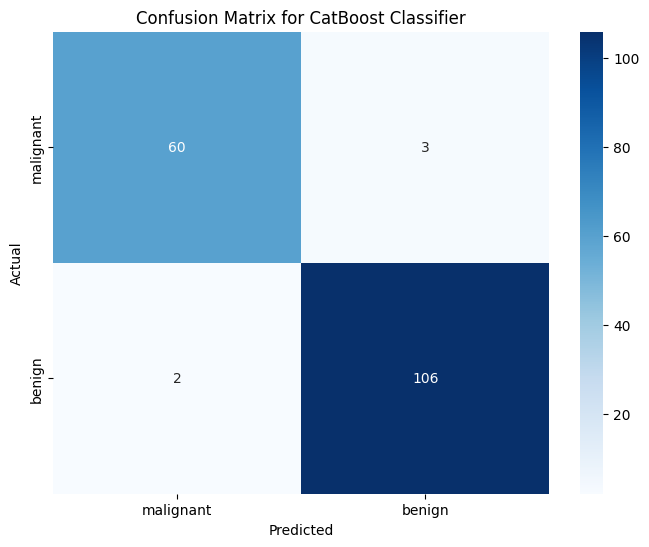

In [24]:
# Make predictions on the test set
y_pred_cat = cat_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_cat)

# Calculate accuracy for reference
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"CatBoost Classifier Accuracy: {accuracy_cat:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()

#**Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numeric and categorical features.**

Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model

# Task
Develop a step-by-step data science pipeline for predicting loan default for a FinTech company, addressing challenges like imbalanced data, missing values, and mixed feature types. The pipeline should include: data preprocessing (handling missing values and encoding categorical features), a justification for choosing between AdaBoost, XGBoost, or CatBoost, a hyperparameter tuning strategy, appropriate evaluation metrics for imbalanced classification, and an explanation of the business benefits of such a model.

## Data Preprocessing and Handling Missing/Categorical Values

### Subtask:
Describe the steps for data preprocessing, including handling missing values (e.g., imputation strategies for numeric and categorical data) and encoding categorical features (e.g., one-hot encoding, target encoding, or CatBoost's native handling).


## Data Preprocessing and Handling Missing/Categorical Values

### Subtask:
Describe the steps for data preprocessing, including handling missing values (e.g., imputation strategies for numeric and categorical data) and encoding categorical features (e.g., one-hot encoding, target encoding, or CatBoost's native handling).

#### Instructions

**1. Handling Missing Values:**

*   **For Numerical Features:** Given the sensitive nature of financial data (loan default), a robust imputation strategy is crucial. We would start by analyzing the distribution of each numerical feature with missing values. If the distribution is roughly normal or symmetric, **mean imputation** could be considered. For skewed distributions, **median imputation** would be more appropriate as it is less sensitive to outliers. More advanced techniques like **K-Nearest Neighbors (KNN) imputation** could be explored if there's a strong correlation between features, as KNN imputes values based on the values of the k-nearest samples, providing more accurate estimates. The choice will depend on the percentage of missing values and the potential impact on model performance.

*   **For Categorical Features:** Missing values in categorical features can often be very informative. Therefore, the primary approach would be to treat missing values as a **separate category**. This allows the model to learn if the absence of information itself is a predictor of loan default. Alternatively, if the missingness is truly random and the category has a clear dominant value, **mode imputation** could be used. However, creating a 'Missing' category is generally safer and more informative for this type of problem.

**2. Encoding Categorical Features:**

*   **For Low-Cardinality Categorical Features:** For categorical features with a small, manageable number of unique values (e.g., gender, loan type, marital status), **One-Hot Encoding (OHE)** would be applied. This method creates new binary columns (dummy variables) for each category present in the feature. For example, if 'Gender' has 'Male' and 'Female', it would be converted into two columns, 'Gender_Male' and 'Gender_Female', with 0 or 1 values. This prevents the model from assuming an ordinal relationship between categories.

*   **For High-Cardinality Categorical Features:** Features like 'Transaction_ID', 'Customer_ID', or potentially 'City' could have a very large number of unique values. Applying One-Hot Encoding to these would result in an excessive number of new features, leading to the curse of dimensionality, increased memory usage, and potentially model instability. For such features, **Target Encoding** (also known as Mean Encoding or Likelihood Encoding) is an option. This technique replaces each category with the mean of the target variable for that category. For instance, a 'City' might be replaced by the average default rate for loans in that city. However, a significant drawback of basic target encoding is its susceptibility to **target leakage**, where information from the target variable is inadvertently used in the feature creation, leading to an over-optimistic evaluation of the model's performance on the training data. This is particularly problematic in cross-validation.

*   **CatBoost's Native Handling:** This is where **CatBoost** becomes a very strong contender for this problem. CatBoost has a sophisticated, built-in mechanism for handling categorical features directly without requiring explicit pre-encoding. It employs an **ordered target encoding** approach. For each observation, the categorical feature value is replaced by the average target value of a subset of *previous* examples (based on a random permutation of the dataset). This intelligent approach ensures that the target value of the current example is *not* used in its own feature transformation, effectively preventing target leakage and mitigating prediction shift. This makes CatBoost exceptionally efficient and robust for datasets with many categorical features, eliminating the need for manual, potentially error-prone, encoding steps.

## Boosting Model Selection

### Subtask:
Discuss the considerations for choosing between AdaBoost, XGBoost, and CatBoost, specifically addressing how each algorithm might handle imbalanced data, mixed feature types, and potential advantages/disadvantages in this FinTech context.


## Boosting Model Selection

### Subtask:
Discuss the considerations for choosing between AdaBoost, XGBoost, and CatBoost, specifically addressing how each algorithm might handle imbalanced data, mixed feature types, and potential advantages/disadvantages in this FinTech context.

### Comparison of Boosting Algorithms for Loan Default Prediction:

In the context of predicting loan default, we need to carefully consider how each boosting algorithm (AdaBoost, XGBoost, CatBoost) handles critical aspects such as imbalanced data, mixed feature types, and their overall suitability for a FinTech scenario.

---

### 1. AdaBoost (Adaptive Boosting)

**Characteristics:** AdaBoost works by sequentially training weak learners (typically decision stumps or shallow trees) and adjusting the weights of misclassified training instances in each iteration, forcing subsequent learners to focus on these 'hard' examples.

*   **Handling Imbalanced Data:**
    *   **Mechanism:** AdaBoost inherently gives more weight to misclassified samples. In an imbalanced dataset, the minority class (e.g., defaulters) is often the one that is harder to classify correctly. By continuously increasing the weights of misclassified minority class samples, AdaBoost naturally focuses more on learning these patterns. This can make it more sensitive to the minority class.
    *   **Considerations:** While it focuses on misclassified samples, AdaBoost doesn't directly optimize for metrics like precision or recall that are crucial for imbalanced data. Over-focusing on a very small, noisy minority class might lead to overfitting.

*   **Handling Mixed Numeric and Categorical Features:**
    *   **Mechanism:** AdaBoost, at its core, relies on the base estimators (e.g., `DecisionTreeClassifier`). These base estimators can handle both numeric and pre-processed categorical features. Numeric features are used directly, while categorical features typically need to be one-hot encoded or label encoded prior to training.
    *   **Preprocessing:** Requires explicit preprocessing of categorical features (e.g., One-Hot Encoding for nominal, Label Encoding for ordinal). Missing values also need imputation.

*   **Advantages for FinTech Loan Default Prediction:**
    *   **Simplicity:** Conceptually simpler than gradient boosting, making it somewhat easier to understand.
    *   **Interpretability (Weak Learners):** If using simple base learners like decision stumps, the individual models can be somewhat interpretable, though the ensemble's interpretability decreases with more learners.
    *   **Effective with Imbalance:** Its weighting mechanism can naturally give attention to the minority class.

*   **Disadvantages for FinTech Loan Default Prediction:**
    *   **Sensitivity to Noise/Outliers:** Highly sensitive to noisy data and outliers because it continuously tries to correct previously misclassified points. In financial data, outliers (e.g., extreme transaction behavior) can be common.
    *   **Training Speed:** Can be slower than gradient boosting methods with many estimators, as each subsequent model depends heavily on the previous one.
    *   **Less Robust:** Generally considered less robust than gradient boosting due to its greedy approach to error correction and lack of explicit regularization.
    *   **Limited Optimization:** Less flexible in optimizing different loss functions compared to gradient boosting.

---

### 2. XGBoost (Extreme Gradient Boosting)

**Characteristics:** XGBoost is an optimized distributed gradient boosting library designed for speed and performance. It builds trees sequentially, with each new tree correcting the errors (residuals) of the previous ones. It incorporates regularization techniques to prevent overfitting.

*   **Handling Imbalanced Data:**
    *   **Mechanism:** XGBoost itself does not have a built-in mechanism that directly prioritizes the minority class through sample weighting like AdaBoost. However, it offers several ways to handle imbalanced data:
        *   **`scale_pos_weight`:** This parameter can be set to `(count_negative_samples / count_positive_samples)` to balance the positive and negative weights, effectively giving more importance to the minority class during training.
        *   **Custom Objective Function:** Advanced users can define custom objective functions that penalize misclassifications of the minority class more heavily.
        *   **Sampling Techniques:** Can be combined with external sampling techniques like SMOTE or undersampling/oversampling.
    *   **Considerations:** Explicit configuration via `scale_pos_weight` or careful custom objective/sampling is required for optimal performance on imbalanced datasets.

*   **Handling Mixed Numeric and Categorical Features:**
    *   **Mechanism:** Like AdaBoost, XGBoost's base learners (CART trees) require categorical features to be pre-processed. It does not natively handle categorical features in its default implementation in the same way CatBoost does.
    *   **Preprocessing:** One-hot encoding is the standard approach. For high-cardinality categorical features, this can lead to a very wide dataset, increasing memory usage and potentially training time. Label encoding might be used but can introduce artificial ordinality, which decision trees can sometimes exploit, but it's generally safer with one-hot encoding or target encoding.
    *   **Missing Values:** XGBoost can handle missing values internally by learning the optimal direction for splits when a value is missing. This is a significant advantage over models that require explicit imputation.

*   **Advantages for FinTech Loan Default Prediction:**
    *   **High Performance/Accuracy:** Often achieves state-of-the-art results in tabular data tasks. This is crucial for high-stakes predictions like loan default.
    *   **Regularization:** Built-in L1 and L2 regularization (`alpha`, `lambda`) and other techniques (`max_depth`, `subsample`, `colsample_bytree`, `eta`/`learning_rate`) effectively prevent overfitting, which is vital in a domain where generalization to unseen applicants is key.
    *   **Speed & Scalability:** Highly optimized, can run on large datasets, and supports parallel processing.
    *   **Missing Value Handling:** Native handling of missing values, reducing the need for extensive imputation.
    *   **Flexibility:** Supports custom objective functions and evaluation metrics, allowing fine-tuning for specific business needs (e.g., optimizing for minimizing false negatives).

*   **Disadvantages for FinTech Loan Default Prediction:**
    *   **Parameter Tuning:** Has many hyperparameters, requiring careful tuning to achieve optimal performance and prevent overfitting.
    *   **Interpretability:** While it can provide feature importance, understanding the exact interactions of many trees can be challenging, though tools like SHAP values can help.
    *   **Categorical Feature Preprocessing:** Requires manual handling of categorical features, which can be cumbersome for datasets with many high-cardinality categories.

---

### 3. CatBoost (Categorical Boosting)

**Characteristics:** CatBoost is another gradient boosting algorithm developed by Yandex, specifically designed to handle categorical features efficiently and robustly. It uses a novel technique for processing categorical features and an ordered boosting scheme to combat prediction shift.

*   **Handling Imbalanced Data:**
    *   **Mechanism:** CatBoost, similar to XGBoost, doesn't have a direct *sample weighting* mechanism like AdaBoost. However, it provides:
        *   **`class_weights`:** Can assign different weights to different classes to address imbalance.
        *   **`auto_class_weights`:** Can automatically calculate class weights based on the inverse of class frequencies.
        *   **Custom Objective Functions:** Similar to XGBoost, allows for custom loss functions.
    *   **Considerations:** Explicitly setting `class_weights` or using `auto_class_weights` is important for imbalanced datasets. Its ordered boosting scheme also makes it inherently more robust, which can indirectly help with minority classes by preventing overfitting caused by prediction shift.

*   **Handling Mixed Numeric and Categorical Features:**
    *   **Mechanism:** This is CatBoost's standout feature. It handles categorical features *natively* and intelligently:
        *   **Ordered Target Encoding:** Instead of traditional target encoding that can cause target leakage, CatBoost uses a sophisticated, permutation-driven approach. For each example, a categorical feature is encoded using the average target value of *only the preceding examples* in a random permutation of the dataset. This prevents target leakage and prediction shift.
        *   **On-the-fly Combinations:** It can automatically discover and create combinations of categorical features during training, capturing complex interactions without manual feature engineering.
        *   **One-Hot Encoding for Low Cardinality:** For categories with very few unique values, it can automatically apply one-hot encoding.
    *   **Preprocessing:** Significantly reduces the need for manual categorical feature preprocessing. Missing values in categorical features are treated as a special category.

*   **Advantages for FinTech Loan Default Prediction:**
    *   **Superior Categorical Feature Handling:** Its native and robust handling of categorical features is a major advantage, especially in FinTech where demographic data (e.g., occupation, education, marital status) and transaction types are often categorical. This simplifies the pipeline and reduces the risk of leakage or suboptimal encoding.
    *   **Robustness to Overfitting:** The ordered boosting principle and special handling of categorical features make it highly robust to overfitting, leading to better generalization.
    *   **Less Parameter Tuning:** Generally requires less hyperparameter tuning than XGBoost to achieve good results.
    *   **Good Default Parameters:** Often performs well with default parameters.
    *   **Built-in Missing Value Handling:** Handles missing values naturally.

*   **Disadvantages for FinTech Loan Default Prediction:**
    *   **Training Speed (Categorical Encoding):** The ordered target encoding and on-the-fly combinations can sometimes make training slower than XGBoost, especially with a very high number of high-cardinality categorical features.
    *   **Interpretability:** Similar to XGBoost, understanding the complex interactions of many trees is difficult.
    *   **Memory Usage:** Can be more memory-intensive due to its encoding mechanisms.

---

### Recommendation for Loan Default Prediction:

For a FinTech company predicting loan default with an imbalanced dataset containing missing values and mixed numeric/categorical features, **CatBoost** or **XGBoost** would be the most suitable choices, with a slight edge to **CatBoost** given the strong emphasis on categorical data handling in FinTech.

**Justification:**

1.  **Handling Imbalanced Data:** Both XGBoost and CatBoost provide mechanisms (`scale_pos_weight` / `class_weights`) to address data imbalance directly in their objective functions, which is more principled than AdaBoost's implicit weighting. This allows us to explicitly optimize for metrics like recall (identifying defaulters) or F1-score.

2.  **Handling Mixed Feature Types:** This is where CatBoost truly shines. Given that customer demographics and transaction behavior often involve numerous categorical features, CatBoost's native, leakage-free handling of these features significantly simplifies the preprocessing pipeline and typically leads to more robust models. XGBoost would require extensive manual preprocessing (e.g., one-hot encoding or careful target encoding) for categorical features, which can be error-prone and computationally expensive for high-cardinality features.

3.  **Regularization and Robustness:** Both XGBoost and CatBoost are highly robust and incorporate strong regularization techniques that are crucial for preventing overfitting in a sensitive domain like FinTech. AdaBoost's sensitivity to noisy data and lack of explicit regularization make it a less ideal choice for this high-stakes scenario.

4.  **Performance:** Both XGBoost and CatBoost are known for achieving high predictive accuracy, which is paramount in loan default prediction to minimize financial risk.

5.  **Interpretability (Post-hoc):** While none of these are inherently as interpretable as a single decision tree, tools like SHAP values can be applied to both XGBoost and CatBoost to gain insights into feature importance and individual prediction explanations, which is valuable for compliance and business understanding in FinTech.

**Why CatBoost might be preferred:** Its built-in, intelligent handling of categorical features (ordered target encoding and on-the-fly combinations) is a significant advantage, as it automates a complex and often critical part of the feature engineering process, reduces the risk of data leakage, and inherently addresses prediction shift. This makes the overall pipeline simpler, more robust, and less prone to manual errors, leading to potentially better-generalizing models with less effort.

## Hyperparameter Tuning Strategy

### Subtask:
Explain a strategy for hyperparameter tuning, including methods like GridSearchCV or RandomizedSearchCV, the importance of cross-validation, and specific hyperparameters relevant to the chosen boosting model for imbalanced datasets.


### Hyperparameter Tuning Strategy

For predicting loan default, a robust hyperparameter tuning strategy is crucial to optimize model performance, especially given the dataset's characteristics (imbalanced, mixed feature types). Here's a step-by-step approach:

**1. Methods for Tuning: GridSearchCV vs. RandomizedSearchCV**

-   **GridSearchCV:** This method performs an exhaustive search over a specified parameter grid. It tries every possible combination of hyperparameters provided. For our problem:
    -   **Advantages:** Guarantees finding the best combination within the defined search space. Useful for smaller, well-understood search spaces.
    -   **Disadvantages:** Computationally expensive and time-consuming, especially with many hyperparameters or a large search space. With a complex boosting model and a potentially wide range of optimal values, it might be impractical for initial, broad searches.

-   **RandomizedSearchCV:** This method samples a fixed number of parameter settings from specified distributions. It explores random combinations of hyperparameters from a given search space. For our problem:
    -   **Advantages:** More computationally efficient than `GridSearchCV`, allowing for exploration of a larger search space in less time. Often finds a good set of hyperparameters faster, particularly when many parameters don't significantly impact performance.
    -   **Disadvantages:** Does not guarantee finding the absolute best combination, as it doesn't explore all possibilities. However, for complex models with many hyperparameters, it's often more effective at finding good regions of the search space.

**Recommendation:** For the initial broad search, `RandomizedSearchCV` is generally preferred due to its computational efficiency. Once a promising region in the hyperparameter space is identified, `GridSearchCV` can be used for a finer-grained search within that region.

**2. Importance of Cross-Validation**

Cross-validation is absolutely crucial for reliable model evaluation and preventing overfitting during hyperparameter tuning. It provides a more robust estimate of how the model will generalize to unseen data compared to a single train-test split.

-   **Mechanism:** The dataset is split into `k` folds. The model is trained `k` times, each time using `k-1` folds for training and the remaining fold for validation. The performance metrics are then averaged across all `k` runs.
-   **Preventing Overfitting:** By evaluating the model on multiple independent validation sets, cross-validation helps detect if the model is memorizing the training data rather than learning generalizable patterns.
-   **Reliable Evaluation:** It provides a more stable estimate of the model's performance and parameter sensitivity, reducing the impact of a particular split of the data.
-   **Importance for Imbalanced Data (Loan Default):** Given the imbalanced nature of loan default data (few defaults, many non-defaults), **Stratified K-Fold Cross-Validation** is essential. This technique ensures that each fold maintains the same class distribution as the original dataset, preventing a fold from having too few (or no) default cases, which would lead to biased evaluation.

**3. Relevant Hyperparameters for Boosting Models (XGBoost/CatBoost)**

Assuming we are using CatBoost or XGBoost for their strengths with mixed data types and performance:

-   **General Hyperparameters (Complexity Control & Learning):**
    -   `n_estimators` (or `iterations` for CatBoost): The number of boosting rounds (trees). More trees increase model complexity and training time; needs to be balanced with learning rate.
    -   `learning_rate` (or `eta` for XGBoost): Shrinks the contribution of each tree. A smaller learning rate usually requires more `n_estimators` but leads to more robust models and helps prevent overfitting.
    -   `max_depth`: The maximum depth of each individual tree. Controls the complexity of individual weak learners. Deeper trees can capture more complex interactions but are more prone to overfitting.
    -   `subsample`: The fraction of samples used for fitting the base learners. Reduces variance and helps prevent overfitting (similar to bagging).
    -   `colsample_bytree` (or `colsample_bylevel`, `colsample_bynode` for XGBoost): The fraction of features (columns) to consider when building each tree. Reduces variance and prevents reliance on specific features.
    -   `min_child_weight` (XGBoost) / `min_data_in_leaf` (CatBoost): Minimum sum of instance weight (Hessian) needed in a child. Controls tree pruning and prevents individual trees from becoming too complex.
    -   `gamma` (XGBoost) / `l1_leaf_reg`, `l2_leaf_reg` (CatBoost): Regularization parameters. `gamma` (min_split_loss) for XGBoost specifies the minimum loss reduction required to make a further partition on a leaf node. CatBoost's `l1_leaf_reg` and `l2_leaf_reg` are L1/L2 regularization terms on leaf values.

-   **Hyperparameters for Handling Class Imbalance:**
    -   `scale_pos_weight` (XGBoost): This is a crucial parameter for imbalanced datasets. It controls the balance of positive and negative weights, useful for unbalanced classes. A common value is `count(negative_examples) / count(positive_examples)`. It essentially gives more weight to the minority class (loan defaults).
    -   `auto_class_weights` (CatBoost): CatBoost can automatically calculate and apply class weights based on the dataset's class distribution. This is a convenient feature for handling imbalance.
    -   `class_weights` (CatBoost): Manually define weights for each class, giving higher weight to the minority class. This can be fine-tuned based on domain knowledge or experimental results.

**4. Imbalance-Specific Tuning Considerations**

When tuning for imbalanced datasets, simply maximizing accuracy can be misleading, as a model might achieve high accuracy by classifying everything as the majority class. Therefore, the choice of evaluation metric during tuning (`scoring` parameter in `GridSearchCV`/`RandomizedSearchCV`) is paramount.

-   **Focus on Recall, Precision, F1-Score, or AUC-ROC/PR:** For loan default prediction, we are likely more interested in correctly identifying actual defaults (high recall for the positive class) while minimizing false positives (high precision for the positive class), or a balance of both. AUC-ROC (Area Under the Receiver Operating Characteristic curve) or AUC-PR (Area Under the Precision-Recall curve) are robust metrics for imbalanced classification. AUC-PR is often preferred when the positive class is very rare.
-   **Direct Tuning of Imbalance Parameters:** `scale_pos_weight` (XGBoost) or `class_weights` (CatBoost) should be included in the hyperparameter search space. We might start with the default (or calculated) imbalance ratio and then fine-tune it around that value.

**5. Iterative Tuning Approach**

An iterative approach to tuning is generally most effective:

1.  **Broad Search (RandomizedSearchCV):** Start with `RandomizedSearchCV` across a wide range for key parameters like `n_estimators`, `learning_rate`, `max_depth`, `subsample`, `colsample_bytree`, and imbalance-handling parameters (e.g., `scale_pos_weight`). Use `Stratified K-Fold` for cross-validation and an appropriate `scoring` metric (e.g., 'roc_auc' or 'f1').
2.  **Refined Search (GridSearchCV/RandomizedSearchCV):** Based on the results of the broad search, identify narrower, more promising ranges for the best-performing hyperparameters. Then, use `GridSearchCV` or another round of `RandomizedSearchCV` with finer steps within these refined ranges.
3.  **Focus on Regularization:** Introduce or further tune regularization parameters (`gamma`, `min_child_weight`, `l1_leaf_reg`, `l2_leaf_reg`) to control overfitting if still observed.
4.  **Sequential Tuning (Optional but Recommended):** Sometimes, tuning parameters in groups (e.g., first `n_estimators` and `learning_rate`, then tree-specific parameters like `max_depth`, then regularization, and finally imbalance parameters) can be more efficient, especially if computational resources are limited. This is often done by keeping other parameters at reasonable defaults while tuning a specific group.

## Evaluation Metrics and Justification

### Subtask:
Identify and justify appropriate evaluation metrics for an imbalanced classification problem like loan default prediction.


### 1. Why Standard Accuracy is Insufficient for Imbalanced Datasets (Loan Default Prediction)

In the context of loan default prediction, the dataset is inherently imbalanced. The vast majority of borrowers will repay their loans (negative class), while a much smaller percentage will default (positive class). Standard accuracy, which is calculated as the ratio of correctly predicted instances to the total instances, can be highly misleading in such scenarios.

**Example:**
Consider a dataset where only 5% of loans default (positive class) and 95% are repaid (negative class). A very simple model that *always predicts 'no default'* would achieve an accuracy of 95%. While this number seems high, the model is completely useless for the business purpose of identifying potential defaulters, as it fails to identify *any* of the actual defaults. It has a 0% recall for the positive class.

**Why it's insufficient for loan default prediction:**

*   **Misleading Performance:** A high accuracy score can give a false sense of security, making it seem like the model is performing well, even if it's completely failing to detect the minority (defaulting) class. For a FinTech company, missing actual defaulters can lead to significant financial losses.
*   **Ignores Minority Class Performance:** Accuracy doesn't distinguish between correctly predicting the majority class and correctly predicting the minority class. In loan default prediction, identifying the minority class (defaulters) is often the primary goal, as these are the high-risk cases that need attention.
*   **Business Impact:** The business cost of misclassifying a defaulter as a non-defaulter (False Negative) is typically much higher than misclassifying a non-defaulter as a defaulter (False Positive). Accuracy treats all errors equally, which is not aligned with the real-world business implications of loan default prediction.

### 2. Key Evaluation Metrics for Imbalanced Classification (Loan Default Prediction)

Given the limitations of accuracy for imbalanced datasets, several other metrics are more appropriate for evaluating models, especially in high-stakes scenarios like loan default prediction. These metrics provide a more nuanced understanding of a model's performance, particularly regarding the minority class.

Here's a breakdown of key metrics:

#### a. Confusion Matrix

Before diving into specific metrics, it's crucial to understand the **Confusion Matrix**, which forms the basis for many classification performance measures. For binary classification (like default/no default), it's a 2x2 table:

|                   | **Predicted: No Default** | **Predicted: Default** |
| :---------------- | :------------------------ | :--------------------- |
| **Actual: No Default** | True Negative (TN)        | False Positive (FP)    |
| **Actual: Default**    | False Negative (FN)       | True Positive (TP)     |

*   **True Positive (TP):** Correctly predicted actual defaulters.
*   **True Negative (TN):** Correctly predicted actual non-defaulters.
*   **False Positive (FP):** Incorrectly predicted a non-defaulter as a defaulter (Type I error).
*   **False Negative (FN):** Incorrectly predicted a defaulter as a non-defaulter (Type II error).

**Relevance for Loan Default:**
*   **FP (Type I Error):** A healthy borrower is incorrectly flagged as a potential defaulter. Business impact: The FinTech company might deny a loan to a creditworthy customer, losing potential revenue and potentially customer goodwill. This is generally less costly than an FN.
*   **FN (Type II Error):** A borrower who will default is incorrectly flagged as a non-defaulter. Business impact: The FinTech company approves a loan to a borrower who will default, leading to financial loss from the defaulted loan. This is often the more critical and costly error in this domain.

#### b. Precision (Positive Predictive Value)

Precision measures the proportion of positive identifications that were actually correct. It answers: "Of all the instances the model predicted as positive, how many were truly positive?"

**Formula:** `Precision = TP / (TP + FP)`

**Relevance for Loan Default:**
High precision means fewer False Positives. If a FinTech company wants to minimize incorrectly rejecting creditworthy applicants (and thus maximize efficiency of their sales/operations team by only reviewing highly likely defaulters), precision is important. However, focusing solely on precision might lead to missing many actual defaulters (high FN rate) if the model is too conservative.

#### c. Recall (Sensitivity, True Positive Rate)

Recall measures the proportion of actual positives that were correctly identified. It answers: "Of all the actual positive instances, how many did the model correctly identify?"

**Formula:** `Recall = TP / (TP + FN)`

**Relevance for Loan Default:**
High recall means fewer False Negatives. In loan default prediction, **recall for the 'default' class is often paramount**. The FinTech company's primary goal is to identify as many potential defaulters as possible to mitigate financial risk. A model with low recall means many risky loans are approved, leading to significant losses. This metric is crucial because of the high cost associated with False Negatives.

#### d. F1-Score

The F1-score is the harmonic mean of Precision and Recall. It provides a single score that balances both precision and recall. It's particularly useful when you need to seek a balance between FP and FN, and when there is an uneven class distribution.

**Formula:** `F1-Score = 2 * (Precision * Recall) / (Precision + Recall)`

**Relevance for Loan Default:**
The F1-score offers a good overall measure when both minimizing False Positives (efficient processing) and False Negatives (risk mitigation) are important, but you want a single metric to optimize. It helps to find a sweet spot where the model is not too conservative (missing defaulters) nor too aggressive (rejecting too many good applicants).

#### e. ROC AUC (Receiver Operating Characteristic - Area Under the Curve)

The ROC curve plots the True Positive Rate (Recall) against the False Positive Rate (`FP / (FP + TN)`) at various classification thresholds. The AUC (Area Under the Curve) measures the entire area underneath the ROC curve. A higher AUC indicates a better ability of the model to distinguish between positive and negative classes.

**Relevance for Loan Default:**
ROC AUC is valuable because it provides an aggregate measure of performance across all possible classification thresholds. It's less sensitive to class imbalance than accuracy. A high ROC AUC indicates that the model can effectively rank potential defaulters higher than non-defaulters. This is useful for decision-making, as the FinTech company can choose a threshold that balances risk tolerance and customer acquisition goals.

#### f. Precision-Recall AUC (PR AUC)

The Precision-Recall curve plots Precision against Recall at various classification thresholds. The Area Under the Precision-Recall Curve is particularly useful for highly imbalanced datasets, where the positive class is rare. For such datasets, PR AUC often provides a more informative and optimistic view of performance than ROC AUC, especially when the goal is to detect the minority class.

**Relevance for Loan Default:**
Given that loan default is typically a rare event, **PR AUC is often considered one of the most appropriate metrics**. It directly focuses on the performance of the positive class (defaulters). A high PR AUC means the model performs well in identifying defaulters without generating an excessive number of false alarms. It is more sensitive to changes in the number of positive predictions compared to ROC AUC, making it a better indicator of how well the model identifies the minority class when it truly matters.

### 3. Most Critical Metrics for a FinTech Company Predicting Loan Default

For a FinTech company predicting loan default, the choice of the most critical evaluation metrics hinges on a careful consideration of the business objectives and the differing costs associated with False Positives (FP) and False Negatives (FN).

In the context of loan default:

*   **False Negative (FN):** A customer who will default is predicted as non-defaulting. **Business Implication:** This is typically the *most costly error*. The company approves a loan that will not be repaid, leading to direct financial loss (principal + interest) and administrative costs for collection efforts. This directly impacts the company's profitability and risk exposure.

*   **False Positive (FP):** A customer who will not default is predicted as defaulting. **Business Implication:** The company denies a loan to a creditworthy customer. This leads to *opportunity cost* (lost potential revenue from interest) and potentially damages customer relations. While undesirable, the financial impact of a single FP is generally less severe than a single FN.

Given this imbalance in error costs, the FinTech company would prioritize metrics that effectively minimize False Negatives, while still keeping False Positives at an acceptable level.

Therefore, the most critical metrics would be:

1.  **Recall (for the 'default' class):**
    *   **Why it's critical:** The primary objective of a loan default prediction model is to identify as many actual defaulters as possible to prevent financial losses. High recall ensures that a large proportion of actual defaulting loans are flagged, allowing the company to mitigate risk by either denying the loan or offering it with adjusted terms. Maximizing recall directly addresses the goal of minimizing the most costly error (FN).

2.  **Precision-Recall AUC (PR AUC):**
    *   **Why it's critical:** As discussed, loan default is an inherently imbalanced problem. PR AUC provides a robust and informative aggregate measure of a model's ability to identify the positive (defaulting) class without being overly sensitive to the majority class. It directly reflects the trade-off between identifying defaulters (recall) and avoiding misclassifying non-defaulters as defaulters (precision). A high PR AUC indicates a model that performs well in detecting the rare, critical event of default while maintaining reasonable precision across various thresholds. This is often a better overall indicator for highly imbalanced datasets than ROC AUC.

3.  **F1-Score:**
    *   **Why it's critical:** While Recall is often prioritized, an extremely high recall achieved at the cost of very low precision (i.e., flagging almost everyone as a potential defaulter) would make the model impractical due to excessive FPs. The F1-score provides a single metric that balances both precision and recall. It's useful for finding a threshold that ensures sufficient recall while maintaining an acceptable level of precision, thereby making the model's recommendations actionable for the business without causing too many unnecessary rejections.

**ROC AUC** is also valuable for understanding the model's overall discriminative power across all thresholds and is less sensitive to class imbalance than accuracy. However, for heavily imbalanced datasets where the positive class is the main focus, PR AUC often provides a more direct and insightful measure of performance in the region of interest (high recall for the positive class).

**In summary, for a FinTech company, the model's performance on the minority class (defaulters) is paramount. Metrics like Recall, PR AUC, and F1-Score are essential for ensuring the model effectively minimizes financial losses due to loan defaults, while also considering the efficiency and customer experience implications of False Positives.**

### 3. Most Critical Metrics for a FinTech Company Predicting Loan Default

For a FinTech company predicting loan default, the choice of the most critical evaluation metrics hinges on a careful consideration of the business objectives and the differing costs associated with False Positives (FP) and False Negatives (FN).

In the context of loan default:

*   **False Negative (FN):** A customer who will default is predicted as non-defaulting. **Business Implication:** This is typically the *most costly error*. The company approves a loan that will not be repaid, leading to direct financial loss (principal + interest) and administrative costs for collection efforts. This directly impacts the company's profitability and risk exposure.

*   **False Positive (FP):** A customer who will not default is predicted as defaulting. **Business Implication:** The company denies a loan to a creditworthy customer. This leads to *opportunity cost* (lost potential revenue from interest) and potentially damages customer relations. While undesirable, the financial impact of a single FP is generally less severe than a single FN.

Given this imbalance in error costs, the FinTech company would prioritize metrics that effectively minimize False Negatives, while still keeping False Positives at an acceptable level.

Therefore, the most critical metrics would be:

1.  **Recall (for the 'default' class):**
    *   **Why it's critical:** The primary objective of a loan default prediction model is to identify as many actual defaulters as possible to prevent financial losses. High recall ensures that a large proportion of actual defaulting loans are flagged, allowing the company to mitigate risk by either denying the loan or offering it with adjusted terms. Maximizing recall directly addresses the goal of minimizing the most costly error (FN).

2.  **Precision-Recall AUC (PR AUC):**
    *   **Why it's critical:** As discussed, loan default is an inherently imbalanced problem. PR AUC provides a robust and informative aggregate measure of a model's ability to identify the positive (defaulting) class without being overly sensitive to the majority class. It directly reflects the trade-off between identifying defaulters (recall) and avoiding misclassifying non-defaulters as defaulters (precision). A high PR AUC indicates a model that performs well in detecting the rare, critical event of default while maintaining reasonable precision across various thresholds. This is often a better overall indicator for highly imbalanced datasets than ROC AUC.

3.  **F1-Score:**
    *   **Why it's critical:** While Recall is often prioritized, an extremely high recall achieved at the cost of very low precision (i.e., flagging almost everyone as a potential defaulter) would make the model impractical due to excessive FPs. The F1-score provides a single metric that balances both precision and recall. It's useful for finding a threshold that ensures sufficient recall while maintaining an acceptable level of precision, thereby making the model's recommendations actionable for the business without causing too many unnecessary rejections.

**ROC AUC** is also valuable for understanding the model's overall discriminative power across all thresholds and is less sensitive to class imbalance than accuracy. However, for heavily imbalanced datasets where the positive class is the main focus, PR AUC often provides a more direct and insightful measure of performance in the region of interest (high recall for the positive class).

**In summary, for a FinTech company, the model's performance on the minority class (defaulters) is paramount. Metrics like Recall, PR AUC, and F1-Score are essential for ensuring the model effectively minimizes financial losses due to loan defaults, while also considering the efficiency and customer experience implications of False Positives.**

## Business Impact and Benefits

### Subtask:
Detail how a robust loan default prediction model would benefit a FinTech company.


A robust loan default prediction model offers significant benefits to a FinTech company, directly impacting its profitability, risk management, and strategic decision-making:

**1. Risk Mitigation and Reduced Financial Losses:**
   - **Proactive Identification:** The primary benefit is the ability to identify potential defaulters *before* loans are disbursed. This allows the company to decline high-risk applications, adjust loan terms, or offer alternative products.
   - **Lower Write-Offs:** By minimizing loans given to individuals likely to default, the company significantly reduces the amount of unrecoverable debt, leading to fewer financial write-offs.
   - **Capital Preservation:** Reduced defaults mean the company retains more capital, which can then be re-invested or used for other growth initiatives.

**2. Optimized Lending Decisions:**
   - **Accurate Credit Scoring:** The model provides a more nuanced and accurate assessment of an applicant's creditworthiness beyond traditional credit scores, incorporating a wider range of demographic and behavioral data.
   - **Tailored Loan Products:** With a better understanding of risk profiles, the FinTech can design and offer highly tailored loan products, interest rates, and repayment schedules that match individual borrower capabilities, increasing acceptance rates for viable customers while deterring high-risk ones.
   - **Automated Decision-Making:** A robust model can automate much of the loan approval process, leading to faster decisions, improved customer experience, and reduced operational costs.

**3. Improved Customer Segmentation and Personalized Offerings:**
   - **Granular Segmentation:** The insights from the model can help segment customers not just by default risk, but also by their propensity to repay on time, their financial stability, and their needs. This allows for more precise marketing and product development.
   - **Personalized Recommendations:** Beyond just loan approval, the model can inform personalized financial advice, cross-selling other suitable financial products, or even recommending financial literacy resources to customers at different risk levels.
   - **Customer Lifetime Value (CLV):** By identifying and retaining good customers and offering them appropriate products, the company can maximize their Customer Lifetime Value.

**4. Regulatory Compliance and Ethical Lending:**
   - **Fairness and Transparency:** A well-built model, especially with careful feature engineering and interpretability, can help ensure fair lending practices and reduce bias, which is crucial for regulatory compliance and maintaining public trust.
   - **Stress Testing:** The model can be used to simulate various economic scenarios and assess the portfolio's resilience, aiding in risk management and capital planning in line with regulatory requirements.

**5. Competitive Advantage:**
   - **Speed and Efficiency:** Faster and more accurate lending decisions provide a significant competitive edge in the fast-paced FinTech industry.
   - **Innovation:** The insights gained from the model can drive further innovation in product development, customer engagement strategies, and overall business model optimization.

## Final Task

### Subtask:
Summarize the step-by-step data science pipeline for loan default prediction using boosting techniques.


## Summary:

### Data Analysis Key Findings

*   **Data Preprocessing Strategies:** For missing numerical features, mean/median imputation (depending on distribution) or K-Nearest Neighbors (KNN) imputation were recommended. Missing categorical values are best treated as a separate category. One-Hot Encoding is suitable for low-cardinality categorical features, while CatBoost's native, leakage-free ordered target encoding is highly preferred for high-cardinality features, simplifying the pipeline and enhancing robustness.
*   **Boosting Model Selection:** XGBoost and CatBoost were identified as the most suitable models for loan default prediction due to their performance, regularization capabilities, and handling of imbalanced data. CatBoost was given a slight edge for its superior and native handling of categorical features (using ordered target encoding), which is particularly beneficial in FinTech datasets rich in such features, preventing target leakage and reducing manual preprocessing effort.
*   **Hyperparameter Tuning Strategy:** `RandomizedSearchCV` was recommended for initial broad searches, followed by `GridSearchCV` for refined tuning. **Stratified K-Fold Cross-Validation** was emphasized as crucial for robust evaluation, especially for imbalanced datasets, ensuring representative class distribution across folds. Key hyperparameters to tune include `n_estimators`, `learning_rate`, `max_depth`, regularization terms, and imbalance-specific parameters like `scale_pos_weight` (XGBoost) or `class_weights` (CatBoost).
*   **Evaluation Metrics for Imbalanced Data:** Standard accuracy was deemed insufficient and misleading for loan default prediction due to the severe class imbalance. **Recall (for the 'default' class)**, **Precision-Recall AUC (PR AUC)**, and **F1-Score** were identified as the most critical evaluation metrics. This is because **False Negatives (missing a defaulter)** are typically far more costly errors for a FinTech company (direct financial loss) than False Positives (denying a creditworthy applicant, an opportunity cost). PR AUC specifically provides a more informative and robust measure of performance for rare positive classes compared to ROC AUC.
*   **Business Benefits:** A robust loan default prediction model offers significant benefits, including **risk mitigation** (proactive identification of defaulters, reduced write-offs, capital preservation), **optimized lending decisions** (accurate credit scoring, tailored loan products, automated processes), **improved customer segmentation**, and ensuring **regulatory compliance** through fairer and more transparent lending practices. It provides a crucial competitive advantage through speed, efficiency, and data-driven innovation.

### Insights or Next Steps

*   Prioritize CatBoost for model development due to its integrated and robust handling of categorical features, which significantly simplifies preprocessing and reduces the risk of data leakage, often leading to more generalizable models in FinTech contexts.
*   When optimizing the model, focus hyperparameter tuning efforts and model evaluation primarily on metrics that reflect the business cost of errors, such as maximizing **Recall** for the default class and achieving a high **Precision-Recall AUC**, to effectively minimize financial losses from undetected loan defaults.
